**Disclaimer**: This TwitterCollector package is created by Gene Moo Lee, Jaecheol Park and Xiaoke Zhang for BAIT 508.


## <font color='blue'>[Part A]</font> Key Word Selection & Data Collection

In [3]:
#Import packages
from pprint import pprint
import time
import json
import nltk
from collections import Counter
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import os

In [2]:
!pip install tweepy
import tweepy
from TwitterCollector import TwitterCollector
from datetime import datetime
bearer_token = r"AAAAAAAAAAAAAAAAAAAAADF%2BhAEAAAAAgfQvhog8hkmMhRptCnZMkSGNjz0%3DM79W5qSLmHjnN5kgj37DpZFUnmCbT7PmJSdnq0dEmY5gXaAwax"
tc = TwitterCollector(bearer_token = bearer_token)

***1) Identify keywords***

In [3]:
query = 'queen elizabeth -HMS -is:retweet lang:en'  # tweets containing 'queen elizabteh', written in English, and excluding retweets

***2) Collect 10k tweets***

In [4]:
recent_tweets = tc.fetch_recent_tweets(query = query  # specify the search query
                                            , tweets_cnt = 10000  # specify the number of tweets you want to collect
                                            , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                            , file_name = '10000 recent post_queen elizabeth_non-retweet_EN.json'
                                      )

NameError: name 'tc' is not defined

In [5]:
#Load saved dataset

with open('10000 recent post_queen elizabeth_non-retweet_EN.json') as infile:
    data = json.load(infile)

In [6]:
#Inspect recent tweets
print(data.keys())
print(type(data['tweets']))
print(data['tweets'][0].keys())
pprint(data['tweets'][0])


dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])
<class 'list'>
dict_keys(['text', 'lang', 'possibly_sensitive', 'created_at', 'public_metrics', 'edit_history_tweet_ids', 'id', 'author_id', 'source'])
{'author_id': '1536704193364361216',
 'created_at': '2022-10-07T22:51:18.000Z',
 'edit_history_tweet_ids': ['1578518357434806272'],
 'id': '1578518357434806272',
 'lang': 'en',
 'possibly_sensitive': False,
 'public_metrics': {'like_count': 0,
                    'quote_count': 0,
                    'reply_count': 1,
                    'retweet_count': 0},
 'source': 'Twitter for iPhone',
 'text': 'those deputies in my city want to rename a street to Queen’s '
         'Elizabeth ll'}


***3) Collect author IDs***

In [16]:
authors = []
for tweet in data['tweets']:
    try:
        txt = tweet['author_id']
        author_info = tc.fetch_author_info(txt)
        authors.append(author_info)
        with open(r"authors/"+str(txt)+".json", 'w', encoding = 'utf-8') as w:
            w.write(json.dumps(author_info))
        time.sleep(2)

    #TooManyRequests workaround taken from https://piazza.com/class/l6361peonhd70r/post/200
    except tweepy.TooManyRequests:
        print('TooManyRequests')
        time.sleep(15*60) # Rest for 15 mins and wait for the timeframe to reset
    #TypeError workaround taken from https://piazza.com/class/l6361peonhd70r/post/211
    except TypeError:
        pass
    #AttributeError workaround taken from https://piazza.com/class/l6361peonhd70r/post/202
    except AttributeError:
        pass

print(len(authors))

TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests
TooManyRequests


KeyboardInterrupt: 

In [18]:
#Create a dictionary to reference this information later on and not rely on successive calls to Twitter's API
#Code created by Xiaoke Zhang
authors_dictionary = {}
for author in os.listdir('authors'):
    try:
        print(os.path.join('authors', author))
        with open(os.path.join('authors', author), 'r', encoding = 'utf-8') as r:
            author_info = json.loads(r.read())
        authors_dictionary[author_info['id']] = author_info
    except TypeError:
        pass

authors/936140032888463360.json
authors/770886120707993600.json
authors/6688732.json
authors/1290409208731574273.json
authors/1092791921079214086.json
authors/1371292362278797312.json
authors/1301163886239010822.json
authors/863842673681158150.json
authors/1576282934478266369.json
authors/1328695541576896512.json
authors/1316888999995211778.json
authors/14681605.json
authors/1475018642693791744.json
authors/1255611165826301953.json
authors/1221871418817830912.json
authors/3491394562.json
authors/1450373064634421248.json
authors/968307292528660481.json
authors/1247617921905496068.json
authors/259878133.json
authors/270685855.json
authors/732049171943952384.json
authors/1562337452211458048.json
authors/311265104.json
authors/1046250114480828417.json
authors/808023126919376897.json
authors/95300589.json
authors/736080977844281344.json
authors/1522131349725155328.json
authors/1577369430434136069.json
authors/19983221.json
authors/1088585960768581632.json
authors/124219349.json
authors/1072

authors/1414137849901895685.json
authors/374834434.json
authors/1618603819.json
authors/1299774914992500737.json
authors/1185300313697411072.json
authors/1179445947463606273.json
authors/72946661.json
authors/1497914517942059008.json
authors/16343974.json
authors/42490691.json
authors/301317286.json
authors/15592792.json
authors/1255431693118386179.json
authors/1521619009636126720.json
authors/1464494560084643840.json
authors/1498036265719009280.json
authors/1196079618442301440.json
authors/608232393.json
authors/739821660828762113.json
authors/1299472555657629696.json
authors/1375518450433589252.json
authors/462537680.json
authors/1233483875420180480.json
authors/1559739397985140743.json
authors/823217128132186112.json
authors/940385118031679494.json
authors/547824954.json
authors/969591535254888449.json
authors/2585934829.json
authors/12268702.json
authors/908309039842562049.json
authors/1326641219380912130.json
authors/1327521749521604608.json
authors/1541095063.json
authors/1523920

authors/28571382.json
authors/3317568853.json
authors/2951650683.json
authors/1172947671071543296.json
authors/482183215.json
authors/1559930561262587904.json
authors/159480891.json
authors/81547682.json
authors/15237665.json
authors/1160640022971867138.json
authors/1518954646496239618.json
authors/1572457317387452418.json
authors/1571547956498812929.json
authors/1090551710.json
authors/59921420.json
authors/21470401.json
authors/62462786.json
authors/1140922998301454337.json
authors/38779859.json
authors/1553844623323406342.json
authors/2350196846.json
authors/1489561071849512962.json
authors/994275661207359488.json
authors/342292165.json
authors/1423291677012217871.json
authors/1038150894649585664.json
authors/3006820468.json
authors/16623929.json
authors/1555229901166362626.json
authors/261690223.json
authors/1348228444790800384.json
authors/1496266142456991745.json
authors/3340282143.json
authors/1518298804675616768.json
authors/876543805901729792.json
authors/577965975.json
author

authors/385664669.json
authors/204481211.json
authors/1521874022165852161.json
authors/178394509.json
authors/1153646700160081920.json
authors/1564720607215878152.json
authors/1285939670032027648.json
authors/1149004722.json
authors/1043486621956546560.json
authors/1016118455022465024.json
authors/119032408.json
authors/708360964744171524.json
authors/1287682374336040960.json
authors/2725285865.json
authors/82275660.json
authors/1128017897706721280.json
authors/2889321607.json
authors/1303980591076061184.json
authors/1408616099458043907.json
authors/931757389929426944.json
authors/1551785565439156225.json
authors/4229108366.json
authors/1472941380146237446.json
authors/1528953253790068736.json
authors/1310327055209369601.json
authors/10371592.json
authors/1392300793.json
authors/821549034506768384.json
authors/839072503641288704.json
authors/1515868035675947009.json
authors/1035768467834716161.json
authors/1395956761790668802.json
authors/1213583292835872768.json
authors/15208258944403

In [8]:
unique_author_ID =[]
author_count = 0
for tweet in data['tweets']:
    ID = tweet['author_id']
    if ID not in unique_author_ID:
        unique_author_ID.append(ID)
        author_count += 1
print(len(unique_author_ID))
print(author_count)

6674
6674


## <font color='blue'>[Part B]</font> Preliminary Analysis

In [19]:
#Prepare words list
words_list = []

for tweet in data['tweets']:
    words = tweet['text'].split()
    words_list.extend(words)

***1a)  10 most popular words (stop words included)***

In [20]:
#Counter w/ stop words
c = Counter(words_list)
c.most_common(10)

[('the', 8917),
 ('Queen', 8476),
 ('Elizabeth', 6672),
 ('of', 5609),
 ('to', 4579),
 ('and', 3861),
 ('in', 3071),
 ('a', 3013),
 ('is', 1895),
 ('for', 1829)]

***1b) 10 most popular words (stop words NOT included)***

In [10]:
#Prepare stop words
with open('stopwords.pkl', 'rb') as f:
    stopwords = pickle.load(f)
new_stops = ['&amp', 'https', 't', 'co', 'T', 'The','&amp;', 'via', 'II.',"II's", 'It', 'And', 'T', 'S', 'need', 'still', 'got', 'called', 'look', 'back', 'thing']
stopwords.extend(new_stops)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
#Eliminate stop words from text
words_list_nonstop = []
for word in words_list:
    if word not in stopwords and len(word)>1:
        words_list_nonstop.append(word)
        
#Counter w/o stop words
c_nonstop = Counter(words_list_nonstop)     
c_nonstop.most_common(10)

[('Queen', 8476),
 ('Elizabeth', 6672),
 ('#Elizabeth', 1791),
 ('II', 1747),
 ('#TheTRNDshop', 1637),
 ('#Tshirt', 1362),
 ('#Queen', 1341),
 ('#Tribute', 1235),
 ('queen', 1025),
 ('Prince', 655)]

***2) 10 most popular hashtags (#)***

In [23]:
#Create a list of hashtags and their appearing frequencies
hash_list = []

for word in words_list:
    if '#' in word:
        hash_list.append(word)

#Sort top 10 frequently mentioned hashtags
c_hash = Counter(hash_list)
c_hash.most_common(10)

[('#Elizabeth', 1791),
 ('#TheTRNDshop', 1637),
 ('#Tshirt', 1362),
 ('#Queen', 1341),
 ('#Tribute', 1235),
 ('#EtsySeller', 438),
 ('#Portrait', 208),
 ('#England', 140),
 ('#Brahmastra', 113),
 ('#ViratKohli', 113)]

***3) 10 most frequenty mentioned usernames (@)***

In [27]:
#Create a list of mentioned users and their appearing frequencies
mention_list = []

for word in words_list:
    if len(word) > 1 and '@' in word:
        mention_list.append(word)
        
#Sort top 10 frequently mentioned users  
c_mention = Counter(mention_list)
c_mention.most_common(10) 

[('@YouTube', 176),
 ('@RoyalFamily', 98),
 ('@HackBlackburn', 69),
 ('@chrisshipitv', 56),
 ('@eBay', 50),
 ('@amazon', 47),
 ('@scobie', 45),
 ('@people', 37),
 ('@HRH_William_', 31),
 ('@RoyalArjan', 30)]

***4) 3 most common sources***

In [28]:
#Create a list of sources and their appearing frequencies
source_list = []
for tweet in data['tweets']:
    source = tweet['source']
    source_list.append(source)

#Sort top 3 common sources    
c_source = Counter(source_list)
c_source.most_common(3)

[('Twitter Web App', 2101),
 ('Twitter for iPhone', 2075),
 ('Twitter for Android', 1692)]

***5) Time trend: Number of tweets per day***

'2022-10-07T22:51:18.000Z'
'2022-10-03T17:55:22.000Z'


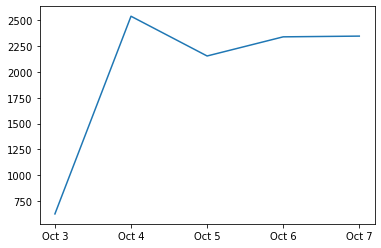

In [30]:
#Inspect time stamps to identify start date and end date
pprint(data['tweets'][0]['created_at'])
pprint(data['tweets'][9999]['created_at'])

#Count number of tweets by days
tweets_by_days = {'Oct 3': 0, 'Oct 4': 0, 'Oct 5': 0, 'Oct 6': 0, 'Oct 7' :0}

for tweet in data['tweets']:
    time_stamp = tweet['created_at']
    if "10-03" in time_stamp:
        tweets_by_days['Oct 3'] += 1
    elif "10-04" in time_stamp:
        tweets_by_days['Oct 4'] += 1
    elif "10-05" in time_stamp:
        tweets_by_days['Oct 5'] += 1
    elif "10-06" in time_stamp:
        tweets_by_days['Oct 6'] += 1
    elif "10-07" in time_stamp:
        tweets_by_days['Oct 7'] += 1

#Plot tweets by days
days = list(tweets_by_days.keys())
counts = list(tweets_by_days.values())


%matplotlib inline 
plt.plot(days,counts)

***6) 3 most influential tweets***

In [111]:
#Create a dictionary of tweets and their influence points
tweet_influence = {}
for tweet in data['tweets']:
    influence_point = sum(list(tweet['public_metrics'].values()))
    text = tweet['text']
    tweet_influence[text]= influence_point

#Sort top 3 influential tweets
df= pd.DataFrame(tweet_influence.items(), columns = ['Tweets', 'Influence points'])
most_influential_tw = df.sort_values('Influence points', ascending=False)[0:3]

print("The most influential tweets are:")
print('\n')
for index, tweet in most_influential_tw.iterrows():
    print("- " + tweet['Tweets'])
    print('\n')
    
df.sort_values('Influence points', ascending=False)[0:3]

The most influential tweets are:


- Today in Newcastle, The Earl of Wessex thanked the local emergency services, volunteers and council staff who lent their support to the State Funeral of Queen Elizabeth. https://t.co/9Kro46jMBC


- @StokeyyG2 Manchester City West Ham queen elizabeth country 😭😭😭


- Mike Myers says he is still "gutted" over Queen Elizabeth's death and shares that Buckingham Palace once played the Austin Powers theme song in his honor when he visited. https://t.co/kWY5S6eOU4 https://t.co/Zlm3S6SYR9




,Tweets,Influence points
2911,"Today in Newcastle, The Earl of Wessex thanked...",8070
2719,@StokeyyG2 Manchester City West Ham queen eliz...,4925
3513,"Mike Myers says he is still ""gutted"" over Quee...",4541


***7) 3 most vocal tweeters***

In [104]:
#Most vocal and most influential

#First we create a dictionary containing every information of interest from the authors
#We take all 'public_metrics' value separately in case a future analysis would need that
    #but we know the most important metrics for our analysis right now are 'tweet_count' and 'influence',
    #which is the sum of all 'public_metrics' values.
author2df = {}
author2df['id'] = []
author2df['username'] = []
author2df['followers'] = []
author2df['tweet_count'] = []
author2df['following_count'] = []
author2df['listed'] = []
author2df['influence'] = []
for author in authors_dictionary.values():
    author2df['id'].append(author['id'])
    author2df['username'].append(author['username'])
    author2df['followers'].append(author['public_metrics']['followers_count'])
    author2df['tweet_count'].append(author['public_metrics']['tweet_count'])
    author2df['following_count'].append(author['public_metrics']['following_count'])
    author2df['listed'].append(author['public_metrics']['listed_count'])
    influence_point = sum(list(author['public_metrics'].values()))
    author2df['influence'].append(influence_point)
    
df_author = pd.DataFrame(author2df)

In [105]:
#7. Who are the three most vocal authors on the keyword?
#In other words, who are the most frequently tweeting authors in the tweet data? 

df_author = pd.DataFrame(author2df)
df_author.sort_values('tweet_count', ascending = False)[0:3]

,id,username,followers,tweet_count,following_count,listed,influence
1014,289118612,TomthunkitsMind,88291,3262266,71409,978,3422944
1176,283604227,AndyVermaut,31246,1948023,34302,59,2013630
1075,3534222021,newsoneplace,1150,1715849,154,1444,1718597


***8) 3 most influential tweeters***

In [106]:
#8. 3 most influential tweeters?
#A user’s influence score is the sum of “followers_count”, “following_count”, “listed_count”
#“tweet_count” in the author data

df_author.sort_values('influence', ascending = False)[0:3]

,id,username,followers,tweet_count,following_count,listed,influence
281,36327407,htTweets,8637783,1137554,139,8323,9783799
556,16343974,Telegraph,3312860,507997,897,21270,3843024
1014,289118612,TomthunkitsMind,88291,3262266,71409,978,3422944


## <font color='blue'>[Part C]</font> Word Cloud

In [72]:
#Convert all tweets into a string without stop words
one_text =''
stopwords2 = nltk.corpus.stopwords.words('english')
stopwords2.extend(new_stops)

for word in words_list_nonstop:
    if len(word) ==1 or word in stopwords or ('https' in word) or 'amp' in word or 'II' in word:
        continue
    one_text = one_text + " " + word
        

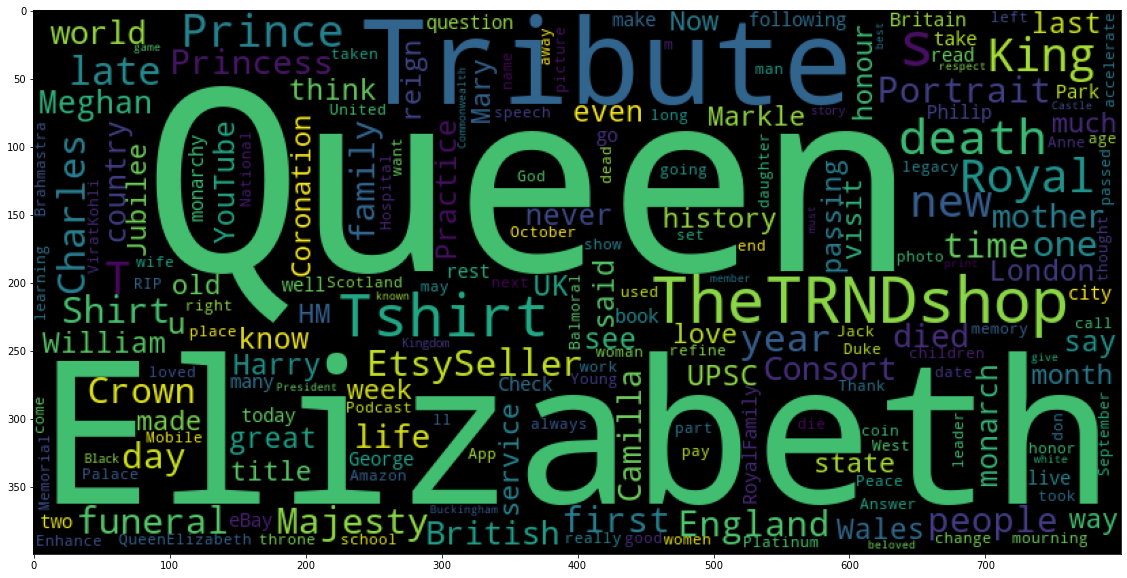

In [73]:
#Run word cloud on the strings\
wordcloud = WordCloud(collocations = False, width = 800, height = 400).generate(one_text)

#Word cloud visualization taken from Professor Gene's in-class example 
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("on") # turn on axis
plt.savefig('queen_word_cloud.png') # save as PNG file
plt.savefig('queen_word_cloud.pdf') # save as PDF file
plt.show()

## <font color='blue'>[Part D]</font> Sentiment Analysis

***1) Average subjectivity & polarity***

In [74]:
subjectivity = []
polarity = []
for tweet in data['tweets']:
    text = tweet['text']
    tb = TextBlob(text)
    polarity.append(tb.sentiment.polarity)
    subjectivity.append(tb.sentiment.subjectivity)


In [75]:
print("Average tweet subjectivity is: " + str(np.mean(subjectivity)))
print("Avergage tweet polarity is: " + str(np.mean(polarity)))

Average tweet subjectivity is: 0.3209450603112936
Avergage tweet polarity is: 0.08026429000369417


***2) Sentiment visualization***

(array([3739.,  449.,  825.,  761., 1044., 1304.,  588.,  453.,  258.,
         579.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

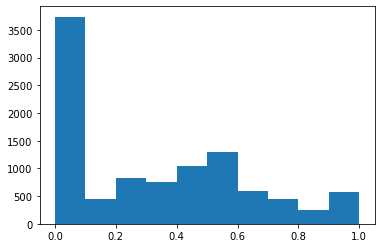

In [76]:
plt.hist(subjectivity, bins = 10)

(array([1.500e+01, 1.000e+00, 4.000e+01, 4.200e+01, 5.000e+01, 1.660e+02,
        2.390e+02, 2.780e+02, 5.080e+02, 4.690e+02, 4.952e+03, 9.330e+02,
        7.630e+02, 4.980e+02, 1.780e+02, 4.410e+02, 1.440e+02, 8.600e+01,
        1.320e+02, 6.500e+01]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

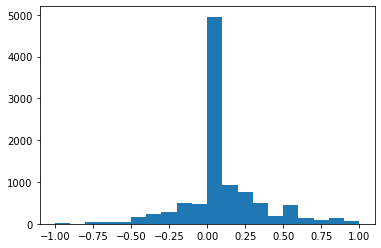

In [77]:
plt.hist(polarity, bins = 20)

***3) Sentiment inspection***

In [78]:
polar_tweets = {}

for tweet in data['tweets']:
    text = tweet['text']
    tb = TextBlob(text)
    sentiment = tb.sentiment.polarity
    polar_tweets[text] = sentiment

print(polar_tweets)


{'those deputies in my city want to rename a street to Queen’s Elizabeth ll': 0.0, 'Hm Queen Elizabeth @AppleMusic @DollyParton   @cher greatest high energy disco dj living': 0.58, '@Angelin25395575 @Cassand80312376 @arsewellbaby Her majesty Queen Elizabeth II had asked Princess Catherine of Wales to wear those jewels to Prince Philips funeral , we can by thus assume she also wanted her to wear them to hers . The Princess of Wales by all accounts is set to inherit all of the Queen’s personal collection': 0.0, 'this not being a goal is why queen elizabeth is rotting in hell as we speak https://t.co/Tlw28QZqcr': 0.0, 'happy for the techno mention but how is ctechno like cdream this is like queen elizabeth comparing herself to princess diana https://t.co/nmz9MmcIhs': 0.8, 'Queen Elizabeth Tribute T-Shirt\n #ElizabethTributeTshirt #TheTRNDshop #EtsySeller\n\n👉https://t.co/CjWkwP0M4y https://t.co/1KuytSzQgE': 0.0, 'Queen Elizabeth Coronation Tribute T-Shirt\n #Coronation #Tshirt #Elizabeth 

In [79]:
df_polarity = pd.DataFrame(polar_tweets.items(), columns = ['Tweet', 'Polarity'])
#print(df_polarity)
sorted_polarity = df_polarity.sort_values('Polarity', ascending = True)
print(sorted_polarity)

                                                  Tweet  Polarity
9315  @LangmanVince Worst Queen Elizabeth impersonat...      -1.0
5675  Queen Elizabeth II (September 8, 2022)\n\nIMMO...      -1.0
5167  ‼️Mane this worst than Queen Elizabeth dieing ...      -1.0
2315  @MarcMillerVM “including a tribute to Queen El...      -1.0
388   @ThaRealBello And they are blaming and insulti...      -1.0
...                                                 ...       ...
4980    @NoContextBrits Queen Elizabeth 2 did her best.       1.0
4518  By Gemma Lawrence "@TudorTweep\nTHE ELIZABETH ...       1.0
8542  @luineco @lesstenny @xskinn Perfect. Up there ...       1.0
6262  @LdSentongo Hi Jenny,\nI have ordered some Tre...       1.0
9209  Queen Elizabeth II Is The Greatest nuclear phy...       1.0

[9890 rows x 2 columns]


In [80]:
most_negative = sorted_polarity.iloc[0:5,0]
for tweet in most_negative:
    print("- " + tweet)
    print('\n')

- @LangmanVince Worst Queen Elizabeth impersonator ever..


- Queen Elizabeth II (September 8, 2022)

IMMORTAL QUEEN: https://t.co/t5g1getjHP

THE STRUGGLE FOR GOODNESS AGAINST EVIL: https://t.co/BNL0Kc1MaH

https://t.co/ET7WWlaqzK


- ‼️Mane this worst than Queen Elizabeth dieing 🤣 https://t.co/bMYFOcUTeL


- @MarcMillerVM “including a tribute to Queen Elizabeth II”

Yes the worst. Who would have done this?
Like nobody can even see it.


- @ThaRealBello And they are blaming and insulting queen Elizabeth




In [81]:
most_positive = sorted_polarity.iloc[-6:-1,0]
for tweet in most_positive:
    print("- " + tweet)
    print('\n')

- Jody Miller, whose “Queen of the House” won the 1966 Grammy Award for best country performance by a woman, died Thursday at age 80.
#TheTRNDshop #Elizabeth #Tshirt #Tribute #Queen 

➡https://t.co/q7kkQ8Lq2F https://t.co/xrXGihnRRD


- @NoContextBrits Queen Elizabeth 2 did her best.


- By Gemma Lawrence "@TudorTweep
THE ELIZABETH OF ENGLAND CHRONICLES
The story of Elizabeth Tudor, the Bastard Princess, who would one day become England’s greatest Queen.
https://t.co/ErGFE2F7Wt


- @luineco @lesstenny @xskinn Perfect. Up there with Caroline Chisholm and Queen Elizabeth II, his forerunners on the $5 note!


- @LdSentongo Hi Jenny,
I have ordered some Treat Me Well badges for you for the 11th for our training at Queen Elizabeth and will let you know when they arrive
Best wishes
@lloyd_page




## <font color='blue'>[Part E]</font> Insights